In [80]:
import os
import yfinance as yf
import quantstats as qs
import scipy.cluster.hierarchy as sch
import cvxopt as opt
import matplotlib.pyplot as plt
import shutil
import base64
import cvxpy as cp

from scipy.stats import spearmanr
from io import BytesIO
from datetime import timedelta
from IPython.display import Image
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
from cvxopt import blas, solvers
from IPython.display import display
from scipy.optimize import minimize
from matplotlib.backends.backend_svg import FigureCanvasSVG

from prep_factor import PrepFactor
from functions.utils.system import *
from functions.utils.func import *

import warnings

warnings.filterwarnings('ignore')

In [81]:
spy = get_spy(us_news.index[0], us_news.index[-1])

[*********************100%%**********************]  1 of 1 completed


In [82]:
us_news = pd.read_parquet(get_large_dir(False) / 'us_news.parquet.brotli')

In [83]:
us_news = (us_news-us_news.mean())/us_news.std()

In [84]:
us_news['daily_pol_60'] = us_news['daily_pol'].rolling(60).mean()

In [85]:
us_news['daily_pol_5'] = us_news['daily_pol'].rolling(21).mean()

In [86]:
spy['spyRet'].corr(us_news['daily_pol'])

0.029715705429623943

<AxesSubplot:xlabel='date'>

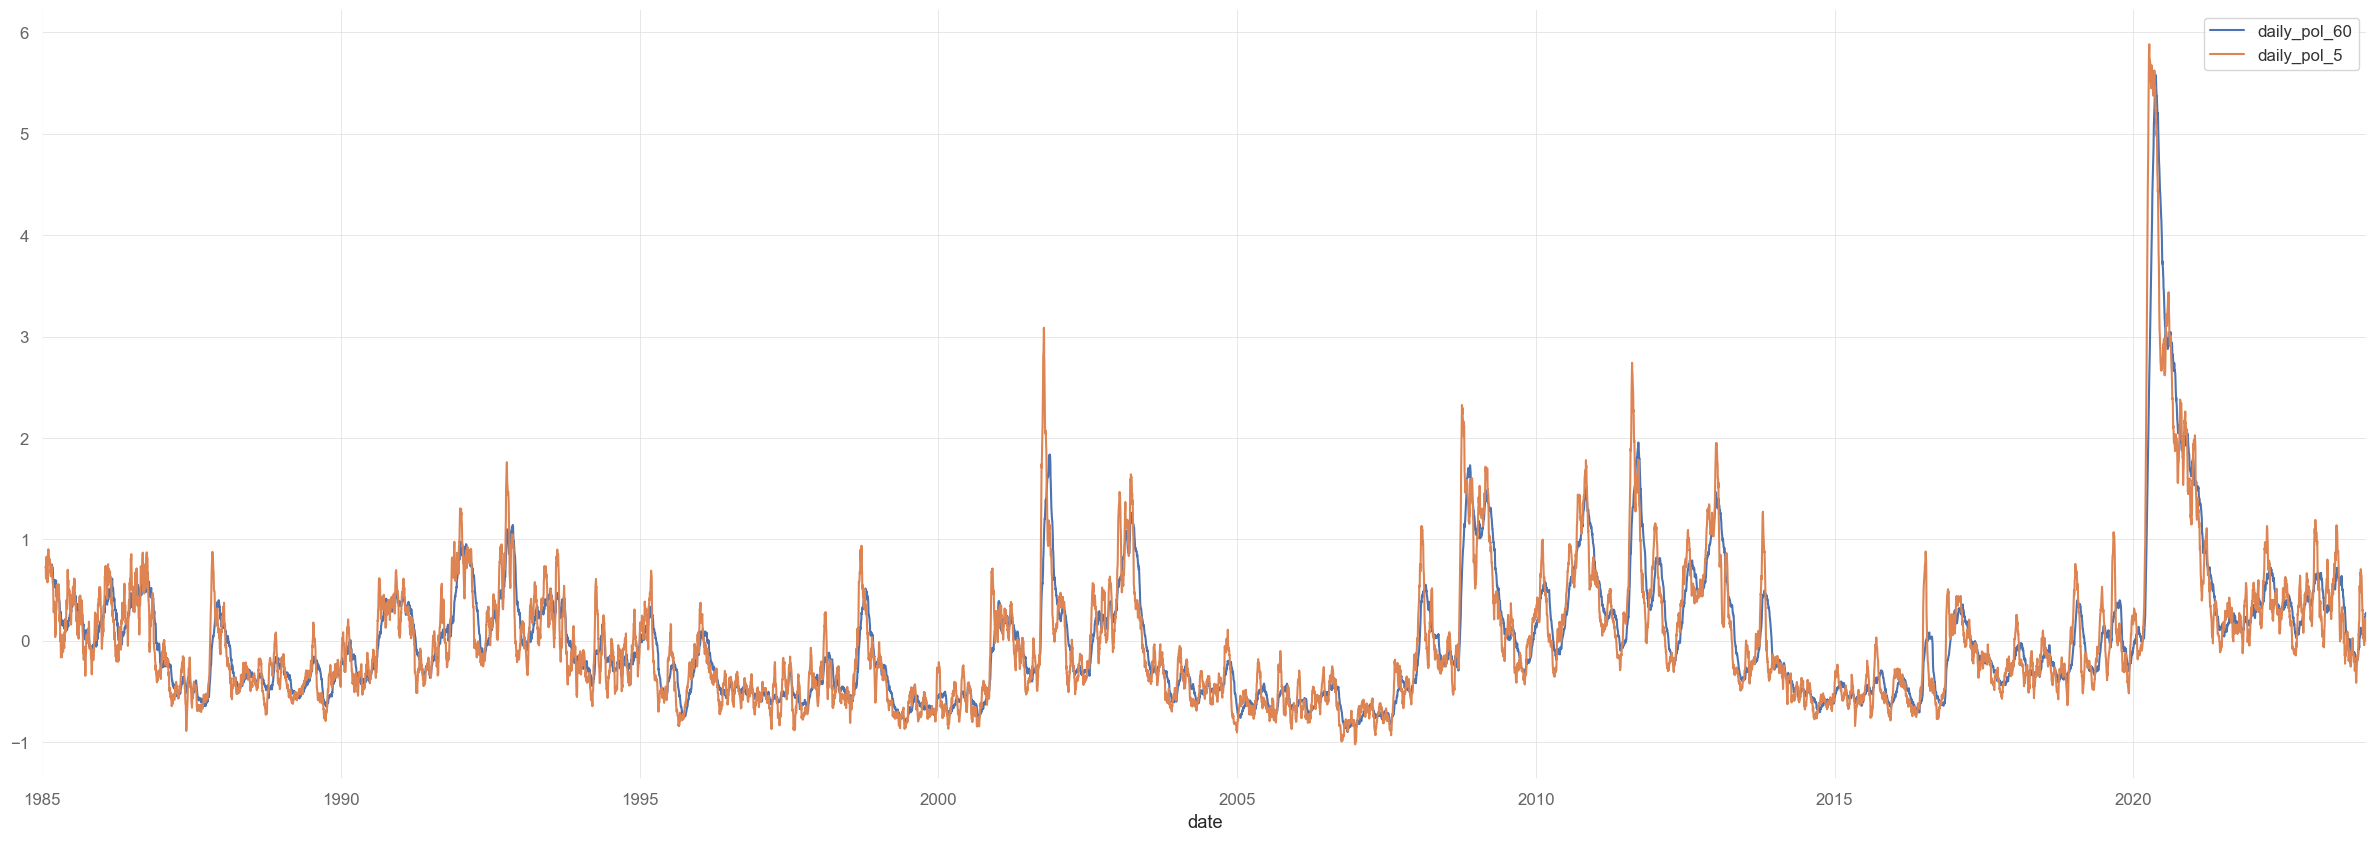

In [88]:
us_news[['daily_pol_60', 'daily_pol_5']].plot(figsize=(30,10))

<AxesSubplot:xlabel='Date'>

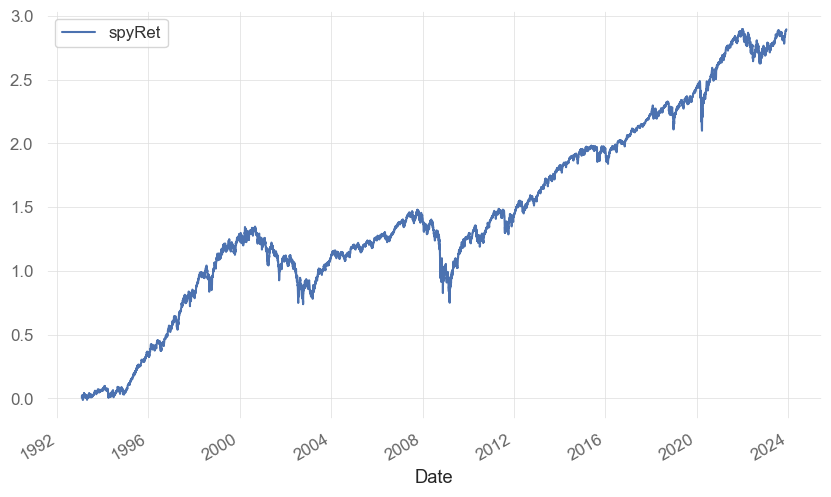

In [91]:
spy.cumsum().plot()